## **Heart Disease Prediction, Comparison on Predictive vs. Generative Models**

**Dataset Source:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Context:**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# **Explanations for each variable:**


**1. Age (Numerical)**: The age of the patient in years.\
**2. Sex (Categorical)**: The biological sex of the patient.\
M: Male\
F: Female\
**3. ChestPainType (Categorical)**: The type of chest pain experienced by the patient.\
TA (Typical Angina): Chest pain related to decreased blood flow to the heart (a sign of coronary artery disease).\
ATA (Atypical Angina): Chest pain not directly related to heart disease.\
NAP (Non-Anginal Pain): Chest pain not related to angina or heart problems.\
ASY (Asymptomatic): No chest pain symptoms.\
**4. RestingBP (Numerical)**: The resting blood pressure of the patient, measured in mm Hg.\
**5. Cholesterol (Numerical)**: The level of serum cholesterol in the blood, measured in mg/dL.\
**6. FastingBS (Binary 0-1)**: Indicates whether the patient’s fasting blood sugar is above 120 mg/dL.\
1: Fasting blood sugar > 120 mg/dL (high)\
0: Fasting blood sugar ≤ 120 mg/dL (normal)\
**7. RestingECG (Categorical)**: The results of the resting electrocardiogram (ECG).\
Normal: No abnormalities detected.\
ST: ST-T wave abnormalities (suggests issues with heart function).\
LVH: Left ventricular hypertrophy (indicates thickening of the heart muscle).\
**8. MaxHR (Numerical)**: The maximum heart rate achieved by the patient during exercise.\
Range: 60 - 202 bpm (beats per minute).\
**9. ExerciseAngina (Binary Y-N)**: Whether the patient experiences angina (chest pain) due to exercise.\
Y: Yes, exercise-induced angina is present.\
N: No, exercise-induced angina is absent.\
**10. Oldpeak (Numerical)**: The ST segment depression induced by exercise, compared to rest. It indicates possible ischemia (insufficient blood flow to the heart).\
**11. ST_Slope (Categorical)**: The slope of the ST segment during peak exercise.\
Up: Up-sloping (better prognosis).\
Flat: Flat (associated with a higher risk of heart disease).\
Down: Down-sloping (indicates severe heart disease).\
**12. HeartDisease (Target Variable) (Binary 0-1)**: The presence or absence of heart disease.\
1: The patient has heart disease.\
0: The patient does not have heart disease (normal).

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import random
from matplotlib import pyplot as plt
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_auc_score, f1_score, precision_score,
     recall_score, confusion_matrix, classification_report, accuracy_score)

# Settings for display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Reading the dataset file and saving as dataframe.
df = pd.read_csv("3-heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Dataset Preprocessing and Exploratory Data Analysis (EDA)**

In [3]:
# Row and column number of the dataset.
df.shape

(918, 12)

The dataset contains 12 variables and 918 observations.

In [4]:
# Statistical values of the numerical variables.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Here, we see the statistical values of the numerical variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset does not have any missing values. The data types are: integer, float and object.

In [6]:
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


There are no duplicated rows either.

# Numerical and Categorical Variable Analysis

In [7]:
# Seperating numerical and categorical variables for further analysis.
# Note: This function is from Miuul.
def grab_col_names(dataframe):
    """

    Gives the names of categorical and numerical variables in the data set.

    Parameters
    ------
        dataframe: dataframe
            Dataframe from which variable names are to be retrieved

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list

    """
    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')

    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)

Variables: 12
cat_cols: 5
num_cols: 7


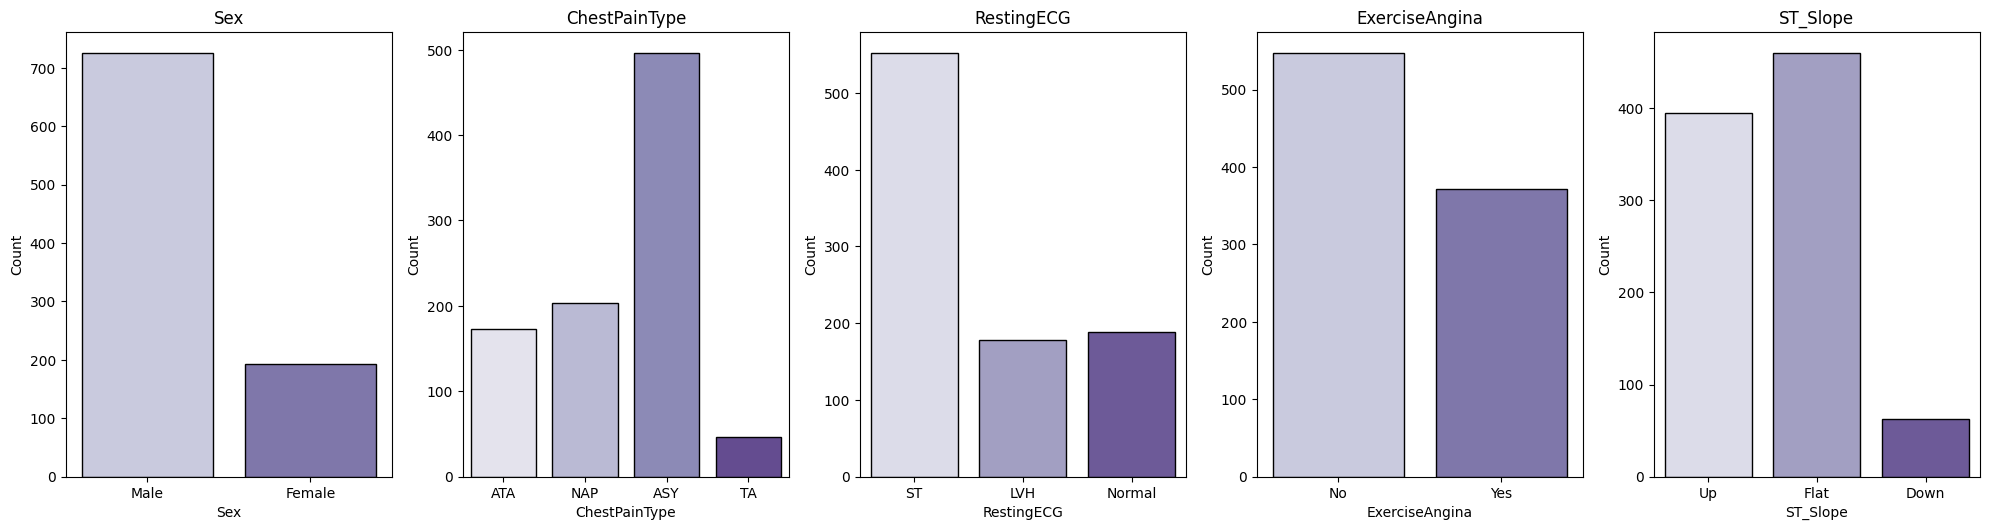

In [8]:
######################################
# Analysis for categorical variables.
######################################

# Creating a temporary copy for visualization because we need to apply label encoding.
df_temp = df.copy()

# Columns to encode
labelEncoderCols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Apply label encoding to temp dataframe
for col in labelEncoderCols:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])

# Mapping for better labels
category_maps = {
    "Sex": {0: "Female", 1: "Male"},
    "ChestPainType": {0: "ASY", 1: "ATA", 2: "NAP", 3: "TA"},
    "RestingECG": {0: "Normal", 1: "ST", 2: "LVH"},
    "ExerciseAngina": {0: "No", 1: "Yes"},
    "ST_Slope": {0: "Down", 1: "Flat", 2: "Up"}
}

# Number of categorical columns
n_cols = len(labelEncoderCols)
n_rows = (n_cols // 4) + (n_cols % 4 > 0)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(labelEncoderCols, 1):
    plt.subplot(n_rows, 5, i)

    # Replacing codes with labels for plotting
    if col in category_maps:
        labels = df_temp[col].map(category_maps[col])
    else:
        labels = df_temp[col]

    sns.countplot(x=labels, hue=labels, palette="Purples", edgecolor="black")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

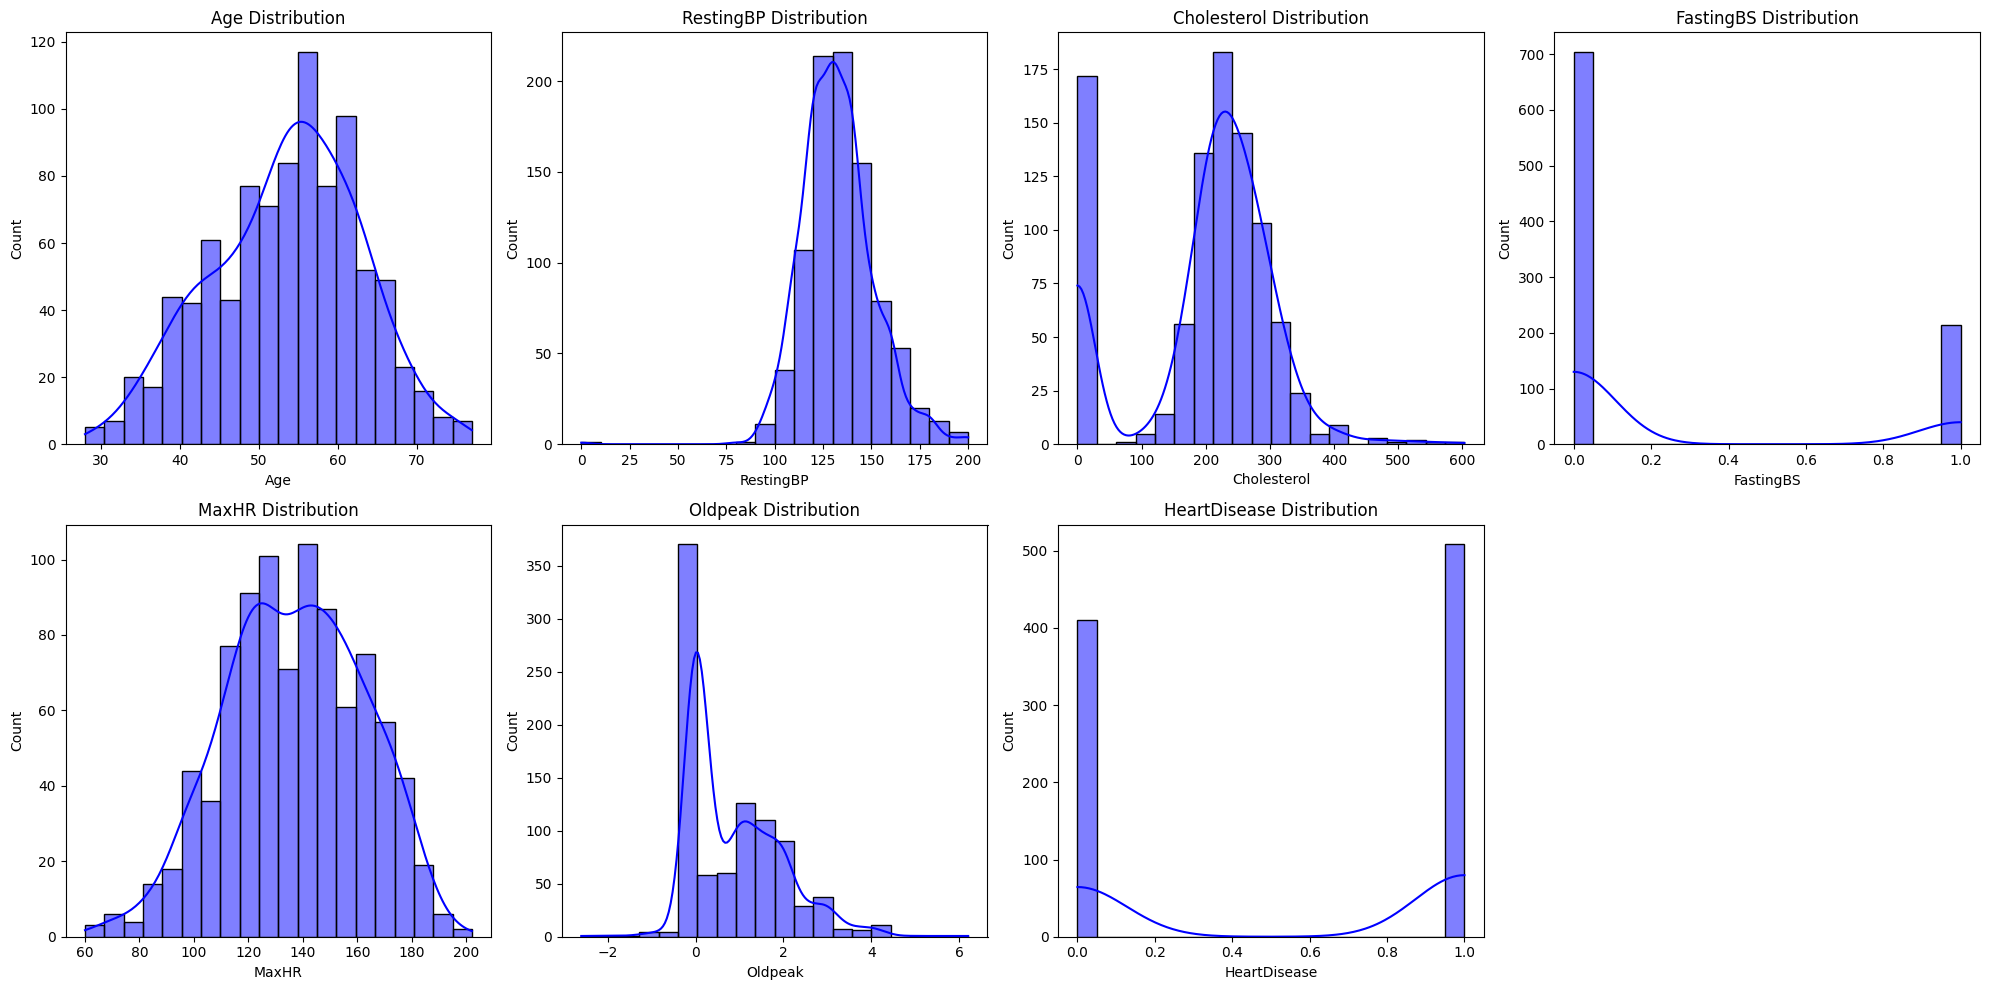

In [9]:
##################################
# Analysis for numeric variables.
##################################

# Number of numerical columns
n_cols = len(num_cols)
n_rows = (n_cols // 4) + (n_cols % 4 > 0)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 4, i) # 4 plot per row

    sns.histplot(df[col], bins=20, color="blue", edgecolor="black", kde=True)

    plt.xlabel(col)
    plt.title(f"{col} Distribution")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Using histogram plots, it is possible to analyze the distribution of the values. If we take a closer look at the ‘Cholesterol’ chart, we see that there are around 175 observations with a value of 0 for ‘Cholesterol’. This is biologically impossible.

There is also a 0 value for RestingBP and that also indicates abnormality and it is not possible biologically.

By changing those values with the median value, we can correct these problems.

# Outlier Processing

In [10]:
# Changing 0 with median value for Cholesterol.
df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())

In [11]:
# Changing 0 with median value for RestingBP.
df["RestingBP"] = df["RestingBP"].replace(0, np.nan)
df["RestingBP"] = df["RestingBP"].fillna(df["RestingBP"].median())

One other strange distribution belongs to the Oldpeak variable. I could not find direct information about the range of the values and asked my doctor friend about this. My doctor friend explained that this variable explains the ST segment in numerical form. The ST segment is the segment between S and T. As we can see from the image, the ST segment is a straight line, and the normal value is 0 in numerical form. In this dataset, 368 out of  918 observations have a value of 0 for the Oldpeak value and is normal.

Analyzing the Oldpeak further as this variable had the highest positive correlation score with the HeartDisease variable.

In [12]:
# Filter the values with Oldpeak = 0 and HeartDisease = 1
oldpeak_zero = df[(df['Oldpeak'] == 0.0) & (df['HeartDisease'] == 1)]

oldpeak_zero.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
16,38,M,ASY,110.0,196.0,0,Normal,166,N,0.0,Flat,1
30,53,M,NAP,145.0,518.0,0,Normal,130,N,0.0,Flat,1
41,54,F,NAP,130.0,294.0,0,ST,100,Y,0.0,Flat,1
49,41,M,ASY,110.0,289.0,0,Normal,170,N,0.0,Flat,1
57,58,M,NAP,130.0,213.0,0,ST,140,N,0.0,Flat,1


In [13]:
# Checking how many values there are
count_oldpeak_zero_hd_one = oldpeak_zero.shape[0]

count_oldpeak_zero_hd_one

124

Here, we can see that when the Oldpeak value is 0, which is the normal value, there are 124 observations that has Heart Disease.

In [14]:
# Filter rows where Oldpeak is 0
oldpeak_zero = df[df['Oldpeak'] == 0.0]

# Count how many of them have HeartDisease = 0 or 1
heart_disease_counts = oldpeak_zero['HeartDisease'].value_counts()

heart_disease_counts

,count
HeartDisease,
0,244
1,124


When the Oldpeak value is normal, there are 124 observations that has Heart Disease and 244 observations that does not.

In [15]:
# Here, we change the outliers with the thresholds.
# Note: This code block is from Miuul.
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)

    # Get column data type
    col_dtype = dataframe[variable].dtype

    # Convert limits to same type as column (int if int, float if float)
    low_limit = col_dtype.type(low_limit)
    up_limit = col_dtype.type(up_limit)

    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    #print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

**Analyzing the numerical variables again after the outlier processing.**

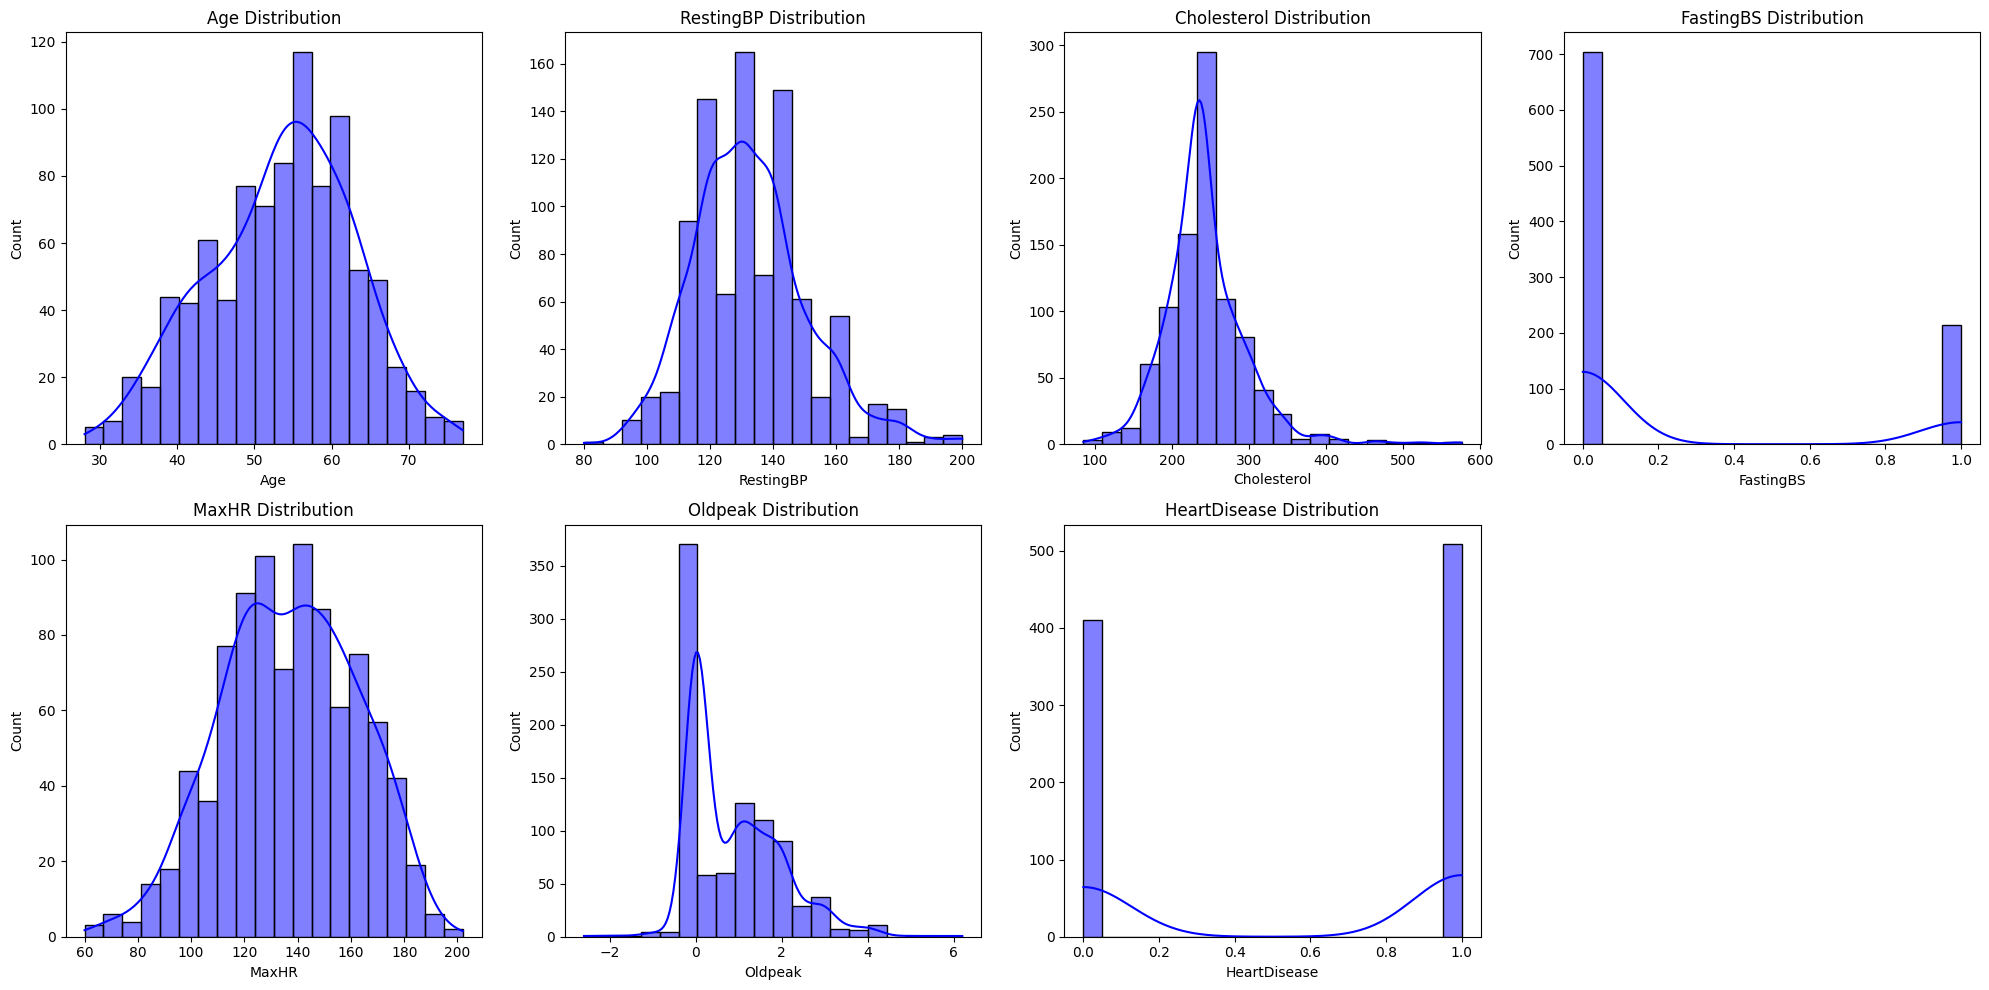

In [16]:
#################################
# Analysis for numeric variables
#################################

# Number of numerical columns
n_cols = len(num_cols)
n_rows = (n_cols // 4) + (n_cols % 4 > 0)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 4, i) # 4 plot per row

    sns.histplot(df[col], bins=20, color="blue", edgecolor="black", kde=True)

    plt.xlabel(col)
    plt.title(f"{col} Distribution")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

As we can see, after the outlier processing, there are no 0 values for Cholesterol and RestingBP.

# Correlation Matrix

<Axes: >

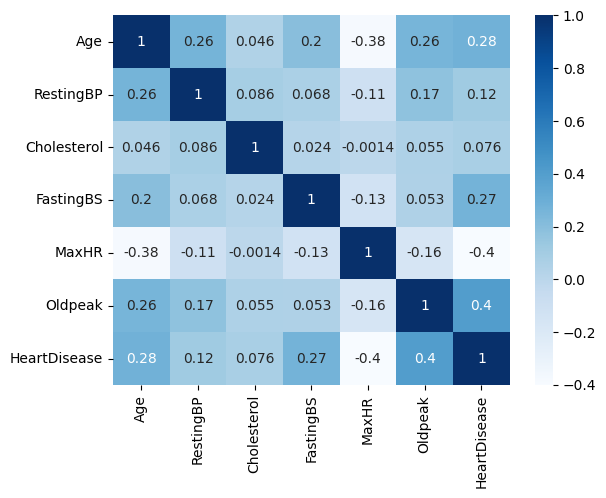

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True)

Negative correlation indicates an inverse correlation. For example for MaxHR and HeartDisease, the correlation value is -0.4. This means that when one variable increases in value, the other decreases. Another example is the Oldpeak and HeartDisease, the correlation value is 0.4 and is the highest positive score.

# **Exploratory Data Analysis on HeartDisease and various variables**

Analyzing Sex and HeartDisease



In [18]:
# Encoding for Sex variable.
df["Sex"] = df["Sex"].map({"F": 0, "M": 1})

sex_map = {0: "Female", 1: "Male"}

for sex in df["Sex"].unique():
    sex_df = df[df["Sex"] == sex]
    total = len(sex_df)
    positives = sex_df["HeartDisease"].sum()
    ratio = positives / total * 100
    label = sex_map.get(sex, "Unknown")

    print(f"{sex} ({label}):")
    print(f"  Total individuals     : {total}")
    print(f"  With heart disease    : {positives}")
    print(f"  Percentage affected   : {ratio:.1f}%\n")

1 (Male):
  Total individuals     : 725
  With heart disease    : 458
  Percentage affected   : 63.2%

0 (Female):
  Total individuals     : 193
  With heart disease    : 50
  Percentage affected   : 25.9%



Analyzing Sex and RestingECG


In [19]:
for sex in df["Sex"].dropna().unique():
    sex_df = df[df["Sex"] == sex]
    total = len(sex_df)
    label = sex_map.get(sex, "Unknown")

    print(f"{sex} ({label}):")
    print(f"  Total individuals     : {total}")

    # Counting RestingECG categories within this sex group
    ecg_counts = sex_df["RestingECG"].value_counts()

    for ecg_type, count in ecg_counts.items():
        ratio = count / total * 100
        print(f"  {ecg_type}: {count} individuals ({ratio:.1f}%)")

    print()  # spacing between groups


1 (Male):
  Total individuals     : 725
  Normal: 434 individuals (59.9%)
  ST: 150 individuals (20.7%)
  LVH: 141 individuals (19.4%)

0 (Female):
  Total individuals     : 193
  Normal: 118 individuals (61.1%)
  LVH: 47 individuals (24.4%)
  ST: 28 individuals (14.5%)



Analyzing Age and HeartDisease



Heart Disease Rate by Age Group (%):
AgeGroup
20-29     0.000000
30-39    36.363636
40-49    41.704036
50-59    58.267717
60-69    73.604061
70-79    66.666667
Name: HeartDisease, dtype: float64


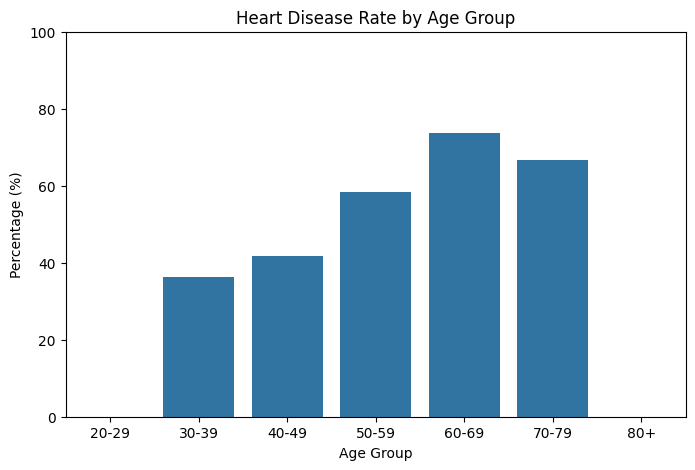

In [20]:
# Creating different age groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,70,80,100], labels=["20-29","30-39","40-49","50-59","60-69","70-79","80+"])

age_group_stats = df.groupby("AgeGroup", observed=True)["HeartDisease"].mean() * 100
print("\nHeart Disease Rate by Age Group (%):")
print(age_group_stats)

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_stats.index, y=age_group_stats.values)
plt.title("Heart Disease Rate by Age Group")
plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)
plt.show()

Analyzing Age and RestingECG

In [21]:
resting_ecg_stats = df.groupby(["AgeGroup", "RestingECG"], observed=True).size().unstack(fill_value=0)

desired_order = ["Normal", "ST", "LVH"]
resting_ecg_stats = resting_ecg_stats.reindex(columns=desired_order)

print("\nRestingECG Category Distribution by Age Group (Ordered):")
print(resting_ecg_stats)


RestingECG Category Distribution by Age Group (Ordered):
RestingECG  Normal  ST  LVH
AgeGroup                   
20-29            2   1    2
30-39           73   9    6
40-49          159  31   33
50-59          215  78   88
60-69           92  52   53
70-79           11   7    6


In [22]:
# We remove the "AgeGroup" we created for the analysis part before we move on to the modeling.
df = df.drop(columns=["AgeGroup"], errors='ignore')

Analyzing Cholesterol and HeartDisease


Predicted Heart Disease Rate by Cholesterol Level (%):
CholesterolCategory
Borderline High    63.569682
High               52.617080
Normal             39.041096
Name: HeartDisease, dtype: float64


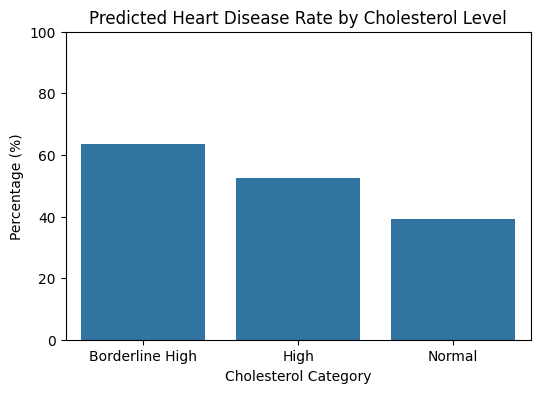

In [23]:
# Cholesterol category labels
def cholesterol_category(value):
    if value < 200:
        return "Normal"
    elif value < 240:
        return "Borderline High"
    else:
        return "High"

# Applying to the synthetic dataframe
df["CholesterolCategory"] = df["Cholesterol"].apply(cholesterol_category)

# Group by category and calculate heart disease rate
chol_stats = df.groupby("CholesterolCategory", observed=True)["HeartDisease"].mean() * 100
print("\nPredicted Heart Disease Rate by Cholesterol Level (%):")
print(chol_stats)

plt.figure(figsize=(6, 4))
sns.barplot(x=chol_stats.index, y=chol_stats.values)
plt.title("Predicted Heart Disease Rate by Cholesterol Level")
plt.ylabel("Percentage (%)")
plt.xlabel("Cholesterol Category")
plt.ylim(0, 100)
plt.show()

In [24]:
# Group by cholesterol category and calculate total, positive count, and percentage
chol_summary = df.groupby("CholesterolCategory", observed=True).agg(
    Total_Count=("HeartDisease", "count"),
    Heart_Disease_Count=("HeartDisease", "sum")
)
chol_summary["Heart_Disease_Rate (%)"] = (chol_summary["Heart_Disease_Count"] / chol_summary["Total_Count"]) * 100

chol_summary = chol_summary.reindex(["Normal", "Borderline High", "High"])

# Print the summary table
print("\nHeart Disease Summary by Cholesterol Category:")
print(chol_summary)


Heart Disease Summary by Cholesterol Category:
                     Total_Count  Heart_Disease_Count  Heart_Disease_Rate (%)
CholesterolCategory                                                          
Normal                       146                   57               39.041096
Borderline High              409                  260               63.569682
High                         363                  191               52.617080


Analyzing Cholesterol and RestingECG


RestingECG Category Counts by Cholesterol Level:
RestingECG           LVH  Normal  ST
CholesterolCategory                 
Borderline High       59     253  97
High                 105     202  56
Normal                24      97  25


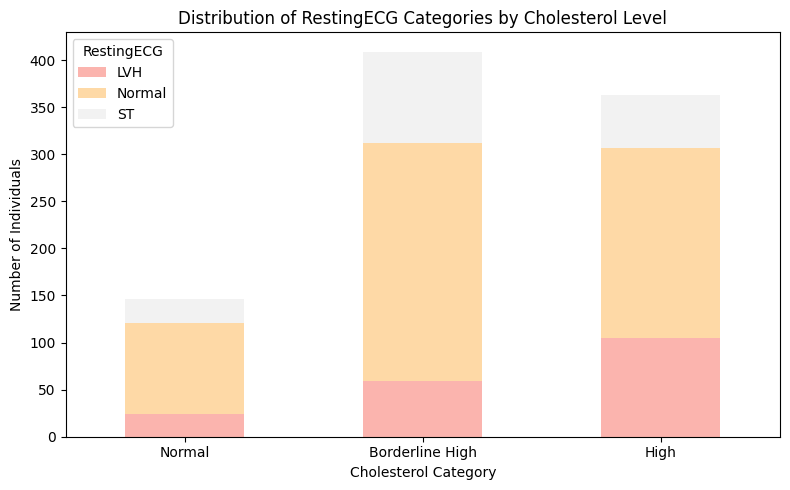

In [25]:
ecg_chol_stats = df.groupby(["CholesterolCategory", "RestingECG"], observed=True).size().unstack(fill_value=0)
print("\nRestingECG Category Counts by Cholesterol Level:")
print(ecg_chol_stats)

ecg_chol_stats = ecg_chol_stats.reindex(["Normal", "Borderline High", "High"])  # optional order

ecg_chol_stats.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel1")
plt.title("Distribution of RestingECG Categories by Cholesterol Level")
plt.ylabel("Number of Individuals")
plt.xlabel("Cholesterol Category")
plt.xticks(rotation=0)
plt.legend(title="RestingECG")
plt.tight_layout()
plt.show()

# For each cholesterol category, the stacked bar shows how many individuals fall into each RestingECG class.

As cholesterol level increases, the number of people with LVH increases. This could indicate a possible association between high cholesterol and left ventricular hypertrophy (LVH).

Most people across all cholesterol levels have "Normal" ECG results.

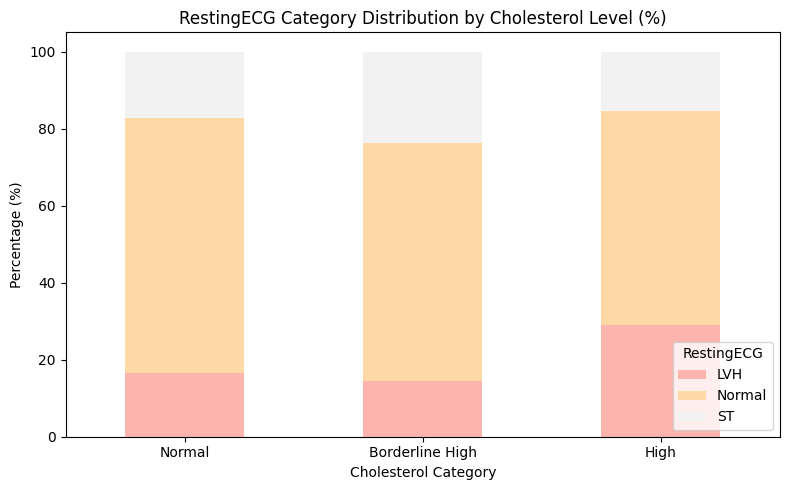

In [26]:
# This plot shows the same results as percentage.
ecg_chol_perc = ecg_chol_stats.div(ecg_chol_stats.sum(axis=1), axis=0) * 100

ecg_chol_perc.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel1")
plt.title("RestingECG Category Distribution by Cholesterol Level (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Cholesterol Category")
plt.xticks(rotation=0)
plt.legend(title="RestingECG")
plt.tight_layout()
plt.show()

In [27]:
# We remove the "CholesterolCategory" we created for the analysis part before we move on to the modeling.
#df = df.drop(columns=["CholesterolCategory"], errors='ignore')

# I then decided on keeping this variable as it increased the model performance.

# **Model Building**

Model building is the part where we use the prepared data to train machine learning algorithms in order to model to learn the patterns between variables and make predictions.

The objective of this project is to compare predictive and generative models in the context of heart disease classification by examining their performance.

**Predictive Models**\
Predictive models learn the direct mapping from input features to the output feature.\
For this project, 3 models were trained and compared by their model performance. These 3 models were:
*   Logistic Regression
*   Decision Tree Classifier
*   Random Tree Classifier

Between these 3 models, Random Forest Classifier had the best model performance and was chosen for further processes.

**Generative Models**\
A generative model is a type of machine learning model that aims to learn the underlying patterns or distributions of data in order to generate new, similar data. For this project, a Neural Network model was trained to learn patterns in the data and make probabilistic predictions of heart disease.


In [28]:
# We will use the copy of the dataset to train the dataset on different models.
df_ = df.copy()

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

labelEncoderCols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "CholesterolCategory"]  # We already applied encoding for 'Sex' variable.

for col in labelEncoderCols:
    df_ = label_encoder(df_, col)

y = df_["HeartDisease"]
X = df_.drop(["HeartDisease"], axis=1)

models = [('LR', LogisticRegression(max_iter=1000)),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier())]

results = {}

for name, model in models:
    results[name] = {}
    for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
        cvs = cross_val_score(model, X, y, scoring=score, cv=10).mean()
        results[name][score] = cvs

for model_name, scores in results.items():
    print(f"Model: {model_name}")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value}")

Model: LR
  roc_auc: 0.9042419894787181
  f1: 0.8442118538545579
  precision: 0.8517001349515242
  recall: 0.8460000000000001
  accuracy: 0.829897276636407
Model: CART
  roc_auc: 0.779573888091822
  f1: 0.8046797656077972
  precision: 0.8142366958034032
  recall: 0.7952549019607844
  accuracy: 0.7896440516005734
Model: RF
  roc_auc: 0.918535150645624
  f1: 0.8633504152653908
  precision: 0.8695142000258244
  recall: 0.8794901960784314
  accuracy: 0.8549211657907311


Accuracy: The ratio of the number of correct predictions and the total number of predictions.\
Precision: The number of true positives divided by the number of predicted positives.\
F1 Score: The harmonic mean of precision and recall.\
Recall: The number of true positives divided by the total number of actual positives.\
ROC-AUC: The area under the Receiver Operating Characteristic (ROC) curve, representing the model’s ability to distinguish between classes across different classification thresholds.

**RF is the best model choice. That is why we will continue with Random Forest model.**


In [29]:
# Using Random Forest, we train the model.
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

labelEncoderCols = ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "CholesterolCategory"] # We already applied encoding for 'Sex' variable.

for col in labelEncoderCols:
    df = label_encoder(df, col)

y = df["HeartDisease"]
X = df.drop(["HeartDisease"], axis=1)

# We will split the dataset into train and test sets here because as the last step of this project we will apply 'Partial Dependence' using the best model(between predictive and generative models).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_final = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_final)
print(f"Random Forest Accuracy: {accuracy:.4f}")

#To ensure reproducibility and reduce variance due to random splits, both the train-test split and the model initialization were fixed using the same random_state value.

Random Forest Accuracy: 0.8641


# **Hyperparameter Optimization/Tuning for Random Forest Model**

In [30]:
# I tried different combinations. As this section takes time, I only left the best combination here.
"""
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
"""

params = {
    'n_estimators': [300],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated accuracy: 0.8664616531544125


In [31]:
# Classification Report for the Best Combination
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_best))


🎯 Test Accuracy: 0.8695652173913043

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [32]:
# Training the model with the best parameter combination
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)

best_rf_model.fit(X_train, y_train)

y_pred_best = best_rf_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))

Test Accuracy: 0.8695652173913043


# **Confusion Matrix for Random Forest Model**

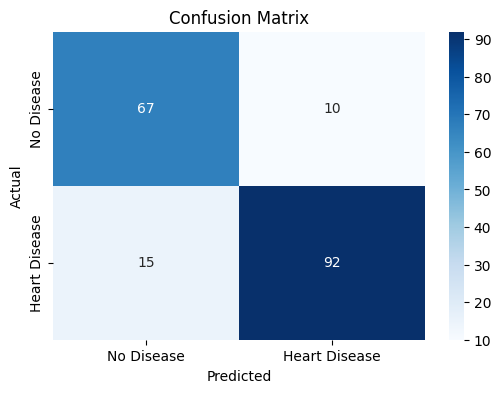

In [33]:
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

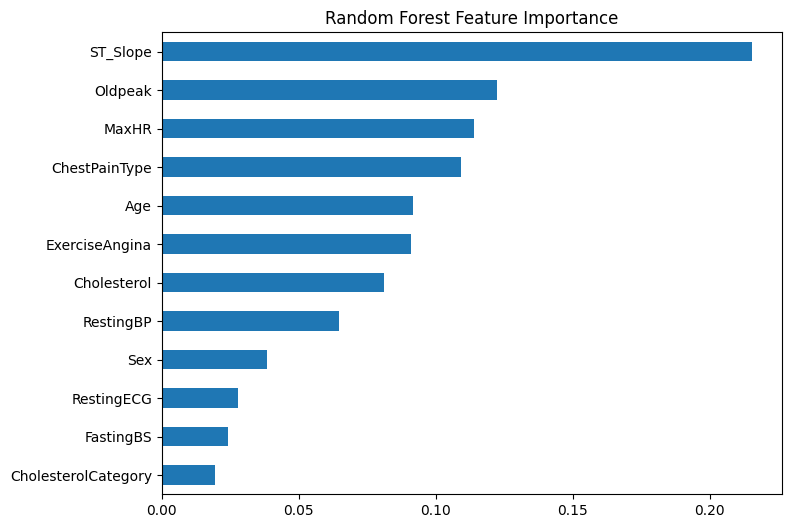

In [34]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind="barh", figsize=(8,6), title="Random Forest Feature Importance")
plt.show()

# Neural Network Model

Before training the neural network model, we performed essential preprocessing steps and defined the hyperparameter tuning process. The dataset was split into training and test sets, followed by standardization to ensure consistent feature scaling. We then implemented a neural network using PyTorch and evaluated multiple configurations by varying optimizers, learning rates, batch sizes, and epoch numbers. The goal was to identify the best-performing setup based on validation accuracy.

Following code block is inspired by my work from 2023:
https://github.com/betulyurtman/PyTorch-Classification-and-Regression/blob/main/Classification_and_Regression.ipynb

In [35]:
# Random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining tensor data
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Model
class HeartDiseaseNN(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# Hyperparameter grids
optimizers_list = ['adam', 'sgd']
learning_rates = [0.01, 0.001]
batch_sizes = [16, 32]
epoch_list = [50, 100]

best_accuracy = 0.0
best_config = {}
results = []

# Hyperparameter tuning with fresh data each time
for opt_name in optimizers_list:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epoch_list:

                # Dataset reload and split per combination
                X = df.drop("HeartDisease", axis=1)
                y = df["HeartDisease"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Standardization
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Tensors
                X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
                X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
                y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

                # Model setup
                model = HeartDiseaseNN(X_train.shape[1])
                if opt_name == 'adam':
                    optimizer = optim.Adam(model.parameters(), lr=lr)
                else:
                    optimizer = optim.SGD(model.parameters(), lr=lr)

                criterion = nn.BCELoss()
                dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
                train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator().manual_seed(42))

                #print(f"\nTraining with {opt_name.upper()}, lr={lr}, batch={batch_size}, epochs={epochs}")
                for epoch in range(epochs):
                    model.train()
                    running_loss = 0.0
                    for inputs, targets in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, targets)
                        loss.backward()
                        optimizer.step()
                        running_loss += loss.item() * inputs.size(0)
                    avg_loss = running_loss / len(train_loader.dataset)

                    # Evaluation
                    model.eval()
                    with torch.no_grad():
                        y_pred_test = model(X_test_tensor)
                        y_pred_test = (y_pred_test > 0.5).float()
                        acc = accuracy_score(y_test_tensor, y_pred_test)

                    #if (epoch+1) % 10 == 0 or epoch == epochs - 1:
                        #print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Test Accuracy: {acc:.4f}")

                results.append((opt_name, lr, batch_size, epochs, acc))
                if acc > best_accuracy:
                    best_accuracy = acc
                    best_config = {
                        "optimizer": opt_name,
                        "lr": lr,
                        "batch_size": batch_size,
                        "epochs": epochs
                    }

# Results Summary
results_df = pd.DataFrame(results, columns=["Optimizer", "LR", "BatchSize", "Epochs", "ValAccuracy"])
print("\n🔍 Best Configuration:")
print(best_config)
print(f"\n✅ Best Validation Accuracy: {best_accuracy:.4f}")
print("\n📊 All Results:")
print(results_df.sort_values(by="ValAccuracy", ascending=False).to_string(index=False))


🔍 Best Configuration:
{'optimizer': 'adam', 'lr': 0.01, 'batch_size': 32, 'epochs': 50}

✅ Best Validation Accuracy: 0.9239

📊 All Results:
Optimizer    LR  BatchSize  Epochs  ValAccuracy
     adam 0.010         32      50     0.923913
     adam 0.001         16     100     0.880435
     adam 0.001         16      50     0.864130
     adam 0.010         16      50     0.864130
     adam 0.001         32      50     0.858696
     adam 0.001         32     100     0.858696
     adam 0.010         16     100     0.853261
     adam 0.010         32     100     0.847826
      sgd 0.010         16     100     0.847826
      sgd 0.010         32     100     0.847826
      sgd 0.010         16      50     0.836957
      sgd 0.010         32      50     0.826087
      sgd 0.001         16     100     0.798913
      sgd 0.001         32      50     0.782609
      sgd 0.001         32     100     0.771739
      sgd 0.001         16      50     0.766304


In [36]:
# Training the model with the best combination.
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Defining model with the best parameters.
final_model = HeartDiseaseNN(X_train.shape[1])
final_optimizer = optim.Adam(final_model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# DataLoader
final_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
final_loader = torch.utils.data.DataLoader(final_dataset, batch_size=32, shuffle=True, generator=torch.Generator().manual_seed(42))

# Model training
final_model.train()
for epoch in range(50):
    epoch_loss = 0.0
    for inputs, targets in final_loader:
        final_optimizer.zero_grad()
        outputs = final_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        final_optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)

    if (epoch+1) % 10 == 0 or epoch == 49:
        print(f"Epoch {epoch+1}/50, Loss: {epoch_loss / len(final_loader.dataset):.4f}")

# Evaluation
final_model.eval()
with torch.no_grad():
    y_pred_final = final_model(X_test_tensor)
    y_pred_final = (y_pred_final > 0.5).float().numpy().flatten()
    final_acc = accuracy_score(y_test_tensor, y_pred_final)

print(f"\n✅ Final Neural Network Accuracy: {final_acc:.4f}")

Epoch 10/50, Loss: 0.3107
Epoch 20/50, Loss: 0.2826
Epoch 30/50, Loss: 0.2677
Epoch 40/50, Loss: 0.2470
Epoch 50/50, Loss: 0.2408

✅ Final Neural Network Accuracy: 0.8804


# **Result Evaluation**

In [37]:
# Preparing the scaled tensor version of the test data
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Generating predictions using the final trained model
final_model.eval()
with torch.no_grad():
    y_probs_nn = final_model(X_test_tensor).numpy().flatten()
    y_pred_nn = (y_probs_nn > 0.5).astype(int)

# Computing evaluation metrics
roc_auc = roc_auc_score(y_test, y_probs_nn)
f1 = f1_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
accuracy = accuracy_score(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Displaying the results
print("🔎 Evaluation Metrics for Neural Network:")
print(f"✅ Accuracy       : {accuracy:.4f}")
print(f"🎯 ROC-AUC        : {roc_auc:.4f}")
print(f"📈 F1-Score       : {f1:.4f}")
print(f"📌 Precision      : {precision:.4f}")
print(f"📍 Recall         : {recall:.4f}")

🔎 Evaluation Metrics for Neural Network:
✅ Accuracy       : 0.8804
🎯 ROC-AUC        : 0.9443
📈 F1-Score       : 0.8962
📌 Precision      : 0.9048
📍 Recall         : 0.8879


# **Confusion Matrix for Neural Network Model**

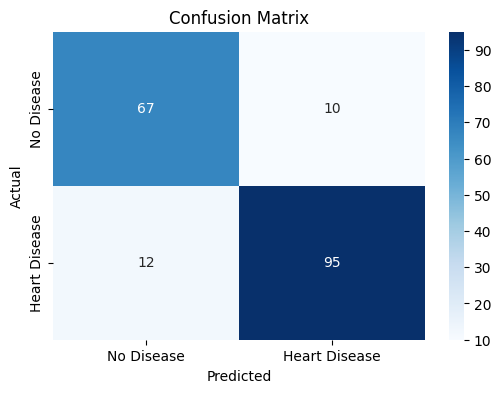

In [38]:
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Neural Network is performs better than Random Forest model and that is why we will continue with Neural Network model.

# **How does changing Oldpeak (from -2.6 to 6.2) affect the average predicted heart disease risk, across all test samples?**

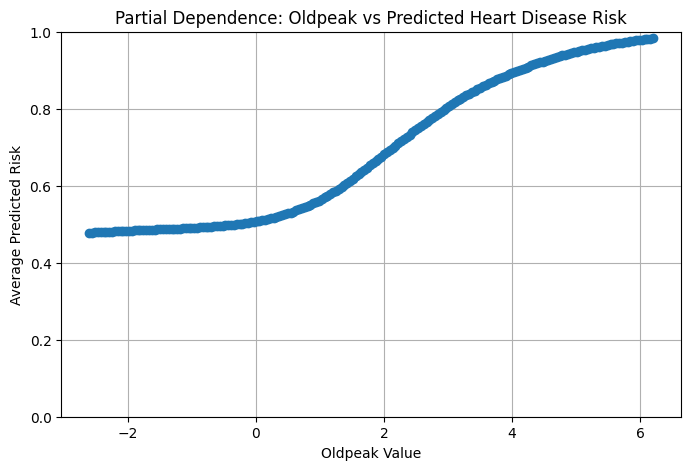

In [39]:
# Create range of Oldpeak values
oldpeak_range = np.linspace(-2.6, 6.2, 200) # np.linspace(start, stop, num)

# Copy test set to work on
X_test_copy = X_test.copy()
avg_preds_oldpeak = []

for val in oldpeak_range:
    X_modified = X_test_copy.copy()
    X_modified["Oldpeak"] = val  # Replace Oldpeak with current

    X_modified_scaled = scaler.transform(X_modified)
    input_tensor = torch.tensor(X_modified_scaled, dtype=torch.float32)

    with torch.no_grad():
        preds = final_model(input_tensor).numpy().flatten()
        avg_pred = preds.mean()
        avg_preds_oldpeak.append(avg_pred)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(oldpeak_range, avg_preds_oldpeak, marker='o')
plt.title("Partial Dependence: Oldpeak vs Predicted Heart Disease Risk")
plt.xlabel("Oldpeak Value")
plt.ylabel("Average Predicted Risk")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

# **How does changing Cholesterol (from 100 to 300) affect the average predicted heart disease risk, across all test samples?**

In [40]:
X_test.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,CholesterolCategory
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,52.951087,0.853261,0.858696,129.733696,240.353261,0.255435,0.989130,139.326087,0.369565,0.816848,1.396739,0.831522
std,9.706220,0.354811,1.014448,18.624262,63.472641,0.437295,0.644346,25.893480,0.484004,0.998244,0.636066,0.753053
min,28.000000,0.000000,0.000000,80.000000,100.000000,0.000000,0.000000,71.000000,0.000000,-1.100000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,212.500000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,237.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,260.250000,1.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,4.000000,2.000000,2.000000


184


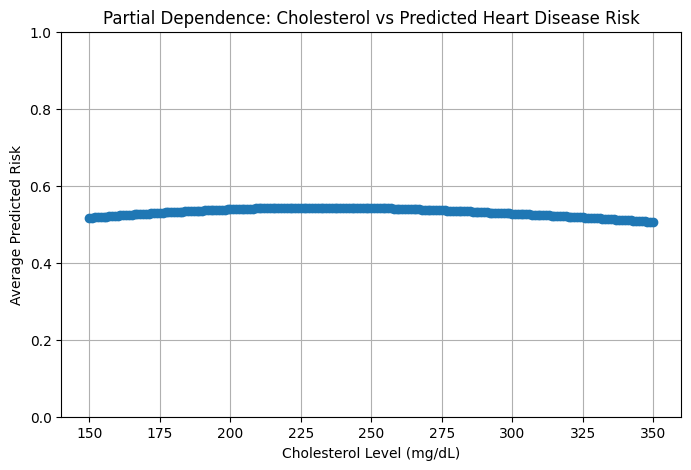

In [41]:
X_test_copy = X_test.copy() # x_test
print(len(X_test_copy))
chol_range = np.arange(150, 351, 1) # cholesterol range
avg_preds = []

# Loop over cholesterol values
for chol in chol_range:
    X_modified = X_test_copy.copy()
    X_modified["Cholesterol"] = chol  # overwrite on constant cholesterol value

    # Scale the modified input
    X_modified_scaled = scaler.transform(X_modified)

    # Convert to tensor
    input_tensor = torch.tensor(X_modified_scaled, dtype=torch.float32)

    # Get predictions
    with torch.no_grad():
        preds = final_model(input_tensor).numpy().flatten()
        avg_pred = preds.mean()  # average over all test samples
        avg_preds.append(avg_pred)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(chol_range, avg_preds, marker='o')
plt.title("Partial Dependence: Cholesterol vs Predicted Heart Disease Risk")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Average Predicted Risk")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

The model does respond to changes in cholesterol. But it doesn’t rely heavily on it to determine heart disease risk.



# **Further investigation on the partial dependence plot to understand why it is flat and not increasing as the cholesterol level increases.**

In [42]:
for chol in [150, 200, 250, 300, 350]:
    X_modified = X_test.copy()
    X_modified["Cholesterol"] = chol
    X_modified_scaled = scaler.transform(X_modified)
    input_tensor = torch.tensor(X_modified_scaled, dtype=torch.float32)
    with torch.no_grad():
        preds = final_model(input_tensor).numpy().flatten()
    print(f"Chol={chol}  -->  Avg Predicted Risk: {preds.mean():.4f}")


Chol=150  -->  Avg Predicted Risk: 0.5168
Chol=200  -->  Avg Predicted Risk: 0.5388
Chol=250  -->  Avg Predicted Risk: 0.5423
Chol=300  -->  Avg Predicted Risk: 0.5275
Chol=350  -->  Avg Predicted Risk: 0.5059


This results shows that average predicted heart disease risk is around 50% for each cholesterol level.

In [43]:
count = df[(df["Cholesterol"] > 300) & (df["HeartDisease"] == 1)].shape[0]
print(f"Number of individuals with Cholesterol > 300 and with heart disease: {count}")

Number of individuals with Cholesterol > 300 and with heart disease: 55


In [44]:
count = df[(df["Cholesterol"] > 300) & (df["HeartDisease"] == 0)].shape[0]
print(f"Number of individuals with Cholesterol > 300 and no heart disease: {count}")

Number of individuals with Cholesterol > 300 and no heart disease: 48


In [45]:
count = X_test[(X_test["Cholesterol"] > 300)].shape[0]
print(f"Number of individuals with Cholesterol > 300: {count}")

Number of individuals with Cholesterol > 300: 17


I could be possible that the average predicted heart disease risk is not increasing as the cholesterol level increases because of the insufficient data observations. There are 55 individuals with cholesterol level higher than 300 and with heart disease. There are 48 individuals with cholesterol level higher than 300 and with no heart disease.

With these numbers being close, it could be normal that the risk does not increases as the cholesterol level increases.

Additionally, there are only 17 individuals with cholesterol level higher than 300 in the test data.